In [2]:
from sqlalchemy import create_engine
import pandas as pd

In [11]:
def database_connect(user, password, host, port, db):
    engine = create_engine(
        f'postgresql://{user}:{password}@{host}:{port}/{db}')
    engine.connect()
    return engine

In [12]:
db_engine = database_connect('root', 'root', 'postgres-db', '5432', 'RetailDB')

In [206]:
sql = '''
    SELECT * 
    FROM online_retail
'''
df = pd.read_sql(sql, db_engine, index_col='Id')
df_copy = df.copy()

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Id,,,,,,,,
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France


In [207]:
df.shape

(541909, 8)

In [208]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [209]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Handling missing values 

In [210]:
df[df['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Id,,,,,,,,
2406,536589,21777,None,-10,2010-12-01 16:50:00,0.00,NaN,United Kingdom
622,536414,22139,None,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom


### Conclusion for missing values
There are just two columns having null values: 
1. `Description`: it is a text value
2. `CustomerID`: it is integer value (for now it is float because of the missing values -handled as NaN-)

## Handling `Description` missing values

In [211]:
df['StockCode'].value_counts()

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
35597B       1
16169N       1
23605        1
90183c       1
23664        1
Name: count, Length: 4070, dtype: int64

In [212]:
df[df['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Id,,,,,,,,
2406,536589,21777,None,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
622,536414,22139,None,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,None,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,None,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,None,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,None,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,None,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,None,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom


There small indication that when `Description` is null the `UnitPrice` is 0, let's investigate more

In [213]:
df[df['Description'].isna()]['UnitPrice'].sum()

0.0

It is true, then we can drop them 

### Final Decision with `Description` nulll values
From Investigation found that the `UnitPrice` is 0.0 when `Description` is missing
So, we can **drop these records**

In [214]:
df = df[~df['Description'].isna()]
df['Description'].isna().sum()

0

In [215]:
df.shape

(540455, 8)

## Handling `CustomerID` missing values

In [216]:
df[df['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Id,,,,,,,,
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom


Investigating if there is any relation between `CustomerID` and any other columns, I expect `InvoiceNo` or `InvoiceDate` or both

In [217]:
df[(df['InvoiceNo'] == '581498') & (df['InvoiceDate'] == '2011-12-09 10:26:00')]['CustomerID'].value_counts()

Series([], Name: count, dtype: int64)

I am suspicious that we can't find any relation

In [218]:
df[df['CustomerID'].isna()]['InvoiceNo'].value_counts()

InvoiceNo
573585    1114
581219     749
581492     731
580729     721
558475     705
          ... 
545299       1
545584       1
545546       1
562937       1
564229       1
Name: count, Length: 2256, dtype: int64

In [219]:
missing_customer_invoices = df[df['CustomerID'].isna()]['InvoiceNo'].unique()
len(missing_customer_invoices)

2256

In [220]:
df[(df['InvoiceNo'].isin(missing_customer_invoices)) & (~df['CustomerID'].isna())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Id,,,,,,,,


### Final Decision with `CustomerID` nulll values
From Investigation found that for all missing CustomerIDs also the InvoiceNo is missing for all of them 
So, we can also **drop these records** due to lack of relationship between it and other columns

In [221]:
df = df[~df['CustomerID'].isna()]
df.shape

(406829, 8)

In [222]:
df['CustomerID'].isna().sum()

0

In [223]:
df['CustomerID'] = df['CustomerID'].astype(int)

In [224]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Summary on handling missing values 
We can use `df.dropna()` for our usecase.

# Handling duplicates
First, we have to investigate if there is duplicates 

In [225]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Id,,,,,,,,
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446,United Kingdom


In [226]:
df.duplicated().sum()

5225

In [227]:
df[(df['InvoiceNo'] == '581538') & (df['StockCode'] == '23343')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Id,,,,,,,,
541666,581538,23343,JUMBO BAG VINTAGE CHRISTMAS,1,2011-12-09 11:34:00,2.08,14446,United Kingdom
541701,581538,23343,JUMBO BAG VINTAGE CHRISTMAS,1,2011-12-09 11:34:00,2.08,14446,United Kingdom


Already we have duplicates and the row is duplicate when all the values is duplicate

### Final Decision with duplicates
We can drop duplicated records (duplicated on all columns)

In [228]:
df = df.drop_duplicates()
df.shape

(401604, 8)

In [229]:
df.duplicated().sum()

0

# Handling Outliers 

In [230]:
!pip install matplotlib

In [231]:
import matplotlib.pyplot as plt

## Handling outliers for `Quantity` column

In [232]:
df['Quantity'].sort_values()

Id
540422   -80995
61624    -74215
4287      -9360
160145    -3114
160144    -2000
          ...  
206121     4300
421632     4800
502122    12540
61619     74215
540421    80995
Name: Quantity, Length: 401604, dtype: int64

<Axes: >

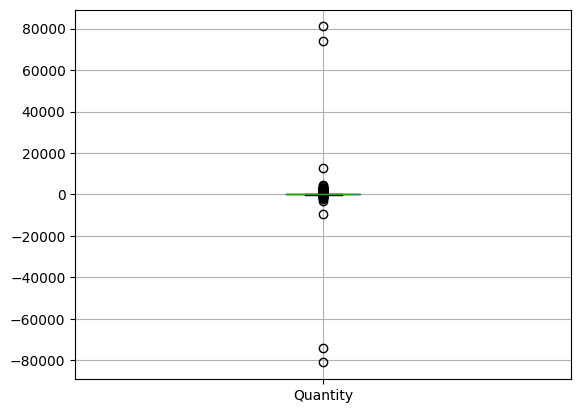

In [233]:
df.boxplot(column=['Quantity'])

In [234]:
df.loc[df['Quantity'] < 0, :]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Id,,,,,,,,
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom


The negative quantites can be positives but with typo or something, we can negate them (convert them to positivies)

In [235]:
df.loc[df['Quantity'] < 0, 'Quantity'] = df.loc[df['Quantity'] < 0, 'Quantity'] * -1

In [236]:
df.loc[df['Quantity'] < 0, :]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Id,,,,,,,,


<Axes: >

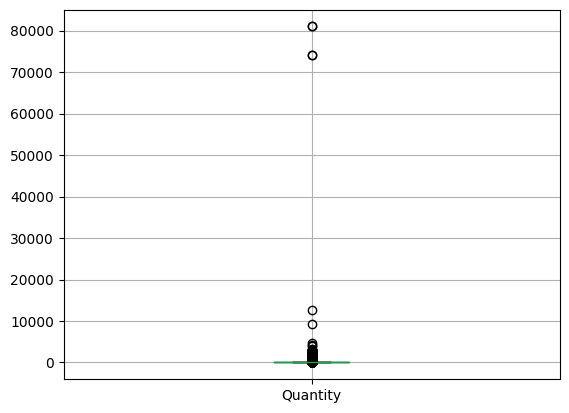

In [237]:
df.boxplot(column=['Quantity'])

<Axes: >

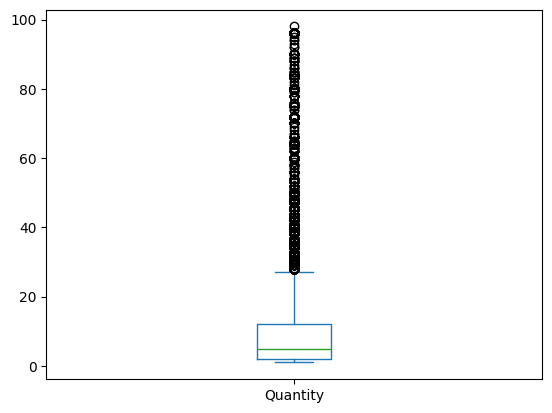

In [238]:
df.loc[df['Quantity'] < 100, 'Quantity'].plot(kind='box')

In [239]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
print(f'Q1 = {Q1}')
print(f'Q3 = {Q3}')
print(f'IQR = {IQR}')

Q1 = 2.0
Q3 = 12.0
IQR = 10.0


### Final Decision with `Quantity` outlier values
We will infer quantity with 100 for all quantities larger than 100 

Around 75% the quantity of the data is under 12, we can take all the data that is under 100 per say

In [240]:
df.loc[df['Quantity'] > 100, 'Quantity'] = 100

<Axes: >

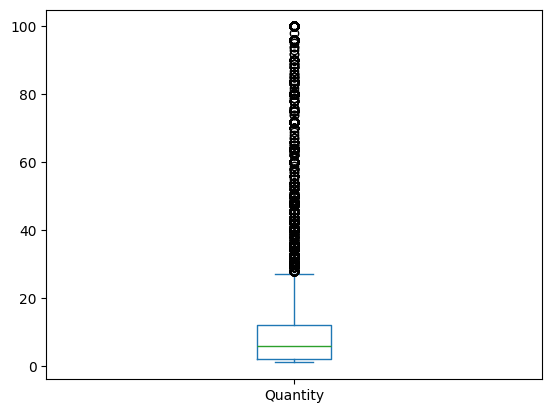

In [241]:
df['Quantity'].plot(kind='box')

## Handling outliers for `UnitPrice` column

<Axes: >

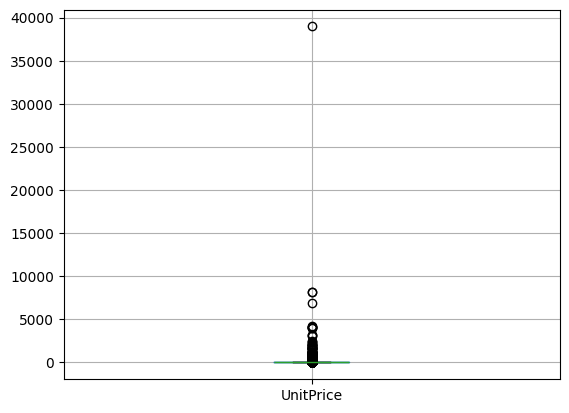

In [242]:
df.boxplot(column=['UnitPrice'])

<Axes: >

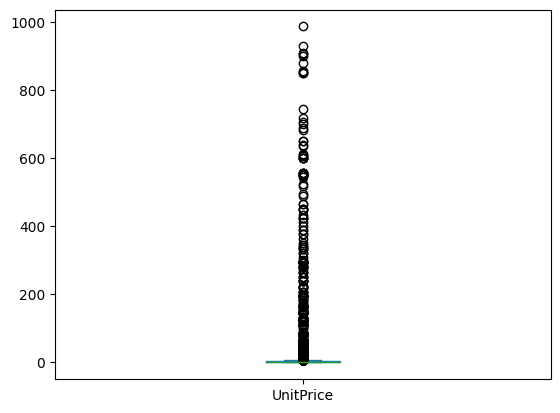

In [261]:
df.loc[df['UnitPrice'] < 1000, 'UnitPrice'].plot(kind='box')

In [251]:
df.loc[df['UnitPrice'] > 1000, :]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Id,,,,,,,,
45622,C540271,M,Manual,1,2011-01-06 11:51:00,1126.00,12503,Spain
73446,C542348,M,Manual,1,2011-01-27 12:09:00,1715.85,12539,Spain
117052,C546325,M,Manual,1,2011-03-11 10:15:00,1687.17,14911,EIRE
117053,C546327,M,Manual,1,2011-03-11 10:18:00,1687.17,14911,EIRE
117054,546328,M,Manual,1,2011-03-11 10:19:00,1687.17,14911,EIRE
117055,546329,M,Manual,1,2011-03-11 10:22:00,1687.17,14911,EIRE
144826,548813,M,Manual,1,2011-04-04 13:03:00,2382.92,12744,Singapore
144828,548813,M,Manual,1,2011-04-04 13:03:00,1252.95,12744,Singapore
144829,548820,M,Manual,1,2011-04-04 13:04:00,2053.07,12744,Singapore


### Final Decision with `UnitPrice` outlier values
We can set all UnitPrices more than 1000 with 1000

In [264]:
df.loc[df['UnitPrice'] > 1000, 'UnitPrice'] = 1000
df.loc[df['UnitPrice'] > 1000, :]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Id,,,,,,,,


# Some other data integrity checks

## 1. Valid `Country` 

In [266]:
df['Country'].value_counts()

Country
United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


Seems all are valid 

## 2. Valid `InvoiceNo`
To comply with the definition of the column: *"InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation"*

In [292]:
def not_valid_invoice(invoice): 
    first_chr = invoice[0:1]
    if first_chr.isalpha() == True and first_chr.lower() != 'c':
        return True 
    elif first_chr.lower() != 'c' and len(invoice) != 6: 
        return True
    else: 
        return False

In [293]:
df['InvoiceNo'].apply(not_valid_invoice).sum()

0

In [275]:
df[df['InvoiceNo'].str.startswith('')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Id,,,,,,,,


## 3. Valid `StockCode` or `CustomerID`
*StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product \
CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.*

In [316]:
def not_valid_stock(stockCode): 
    if len(stockCode) != 5: 
        return True
    else: 
        return False

In [317]:
df[df['StockCode'].apply(not_valid_stock)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Id,,,,,,,,
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583,France
...,...,...,...,...,...,...,...,...
541778,581578,84997C,CHILDRENS CUTLERY POLKADOT BLUE,8,2011-12-09 12:16:00,4.15,12713,Germany
541809,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581,United Kingdom
541838,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748,United Kingdom


### Not valid `StockCode`
For the StockCode there are many records that doesn't comply with the definition, they have characters and the length is more than 5 

In [306]:
def not_valid_customer(customer): 
    if len(str(customer)) != 5: 
        return True
    else: 
        return False

In [308]:
df['CustomerID'].apply(not_valid_customer).sum()

0

# Insert the data into new table `online_retail_cleaned`

In [322]:
from time import time

In [324]:
t_start = time()
df.to_sql(name='online_retail_cleaned', con=db_engine, if_exists='replace', index=True, index_label='Id')
print(f'Finished insertion in {time()-t_start:.3}s')

Finished insertion in 13.4s
